# Домашнее задание №3 - Линейная регрессия для предсказания продолжительности жизни

В этой части домашки вам нужно сделать вашу первую полноценную **модель машинного обучения**!

Для этого мы возьмем датасет по **продолжительности жизни** и попробуем построить по нему **линейную регрессию**. Будем стараться выделить наиболее **важные для продолжительности жизни признаки**, а также постараемся сделать нашу модель **устойчивой** к новым данным - то есть избежать **переобучения**.

Описание датасета можно найти [тут](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Часть 1. EDA (15 баллов)

Загрузите датасет `Life Expectancy Data.csv`

Как и всегда, для начала вам нужно провести небольшое **EDA** ваших данных, убедиться в том, что в них нет **пропущенных значений** или еще каких-то **бед**.

Советуем **убрать** из рассмотрения **категориальные переменные**, чтобы они вас не смущали.

Помимо этого, обратите внимание на **стандартизацию** ваших данных. Но с этим **не торопитесь**. Сделайте EDA и посмотрите, что будет, когда мы проведём разбиение данных на тестовую и тренировочную выборки.

In [2]:
df = pd.read_csv("../data/Life Expectancy Data.csv")
df.columns = df.columns.str.strip()  # кто оставляет пробелы в колонках...

In [3]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [4]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [6]:
df = df.select_dtypes(include=[np.number]).dropna()

Я не очень поняла нужно ли было переводит страны в кодировку, но так как там 193 страны, я решила от греха подальше удалить... В итоге минус две колонки

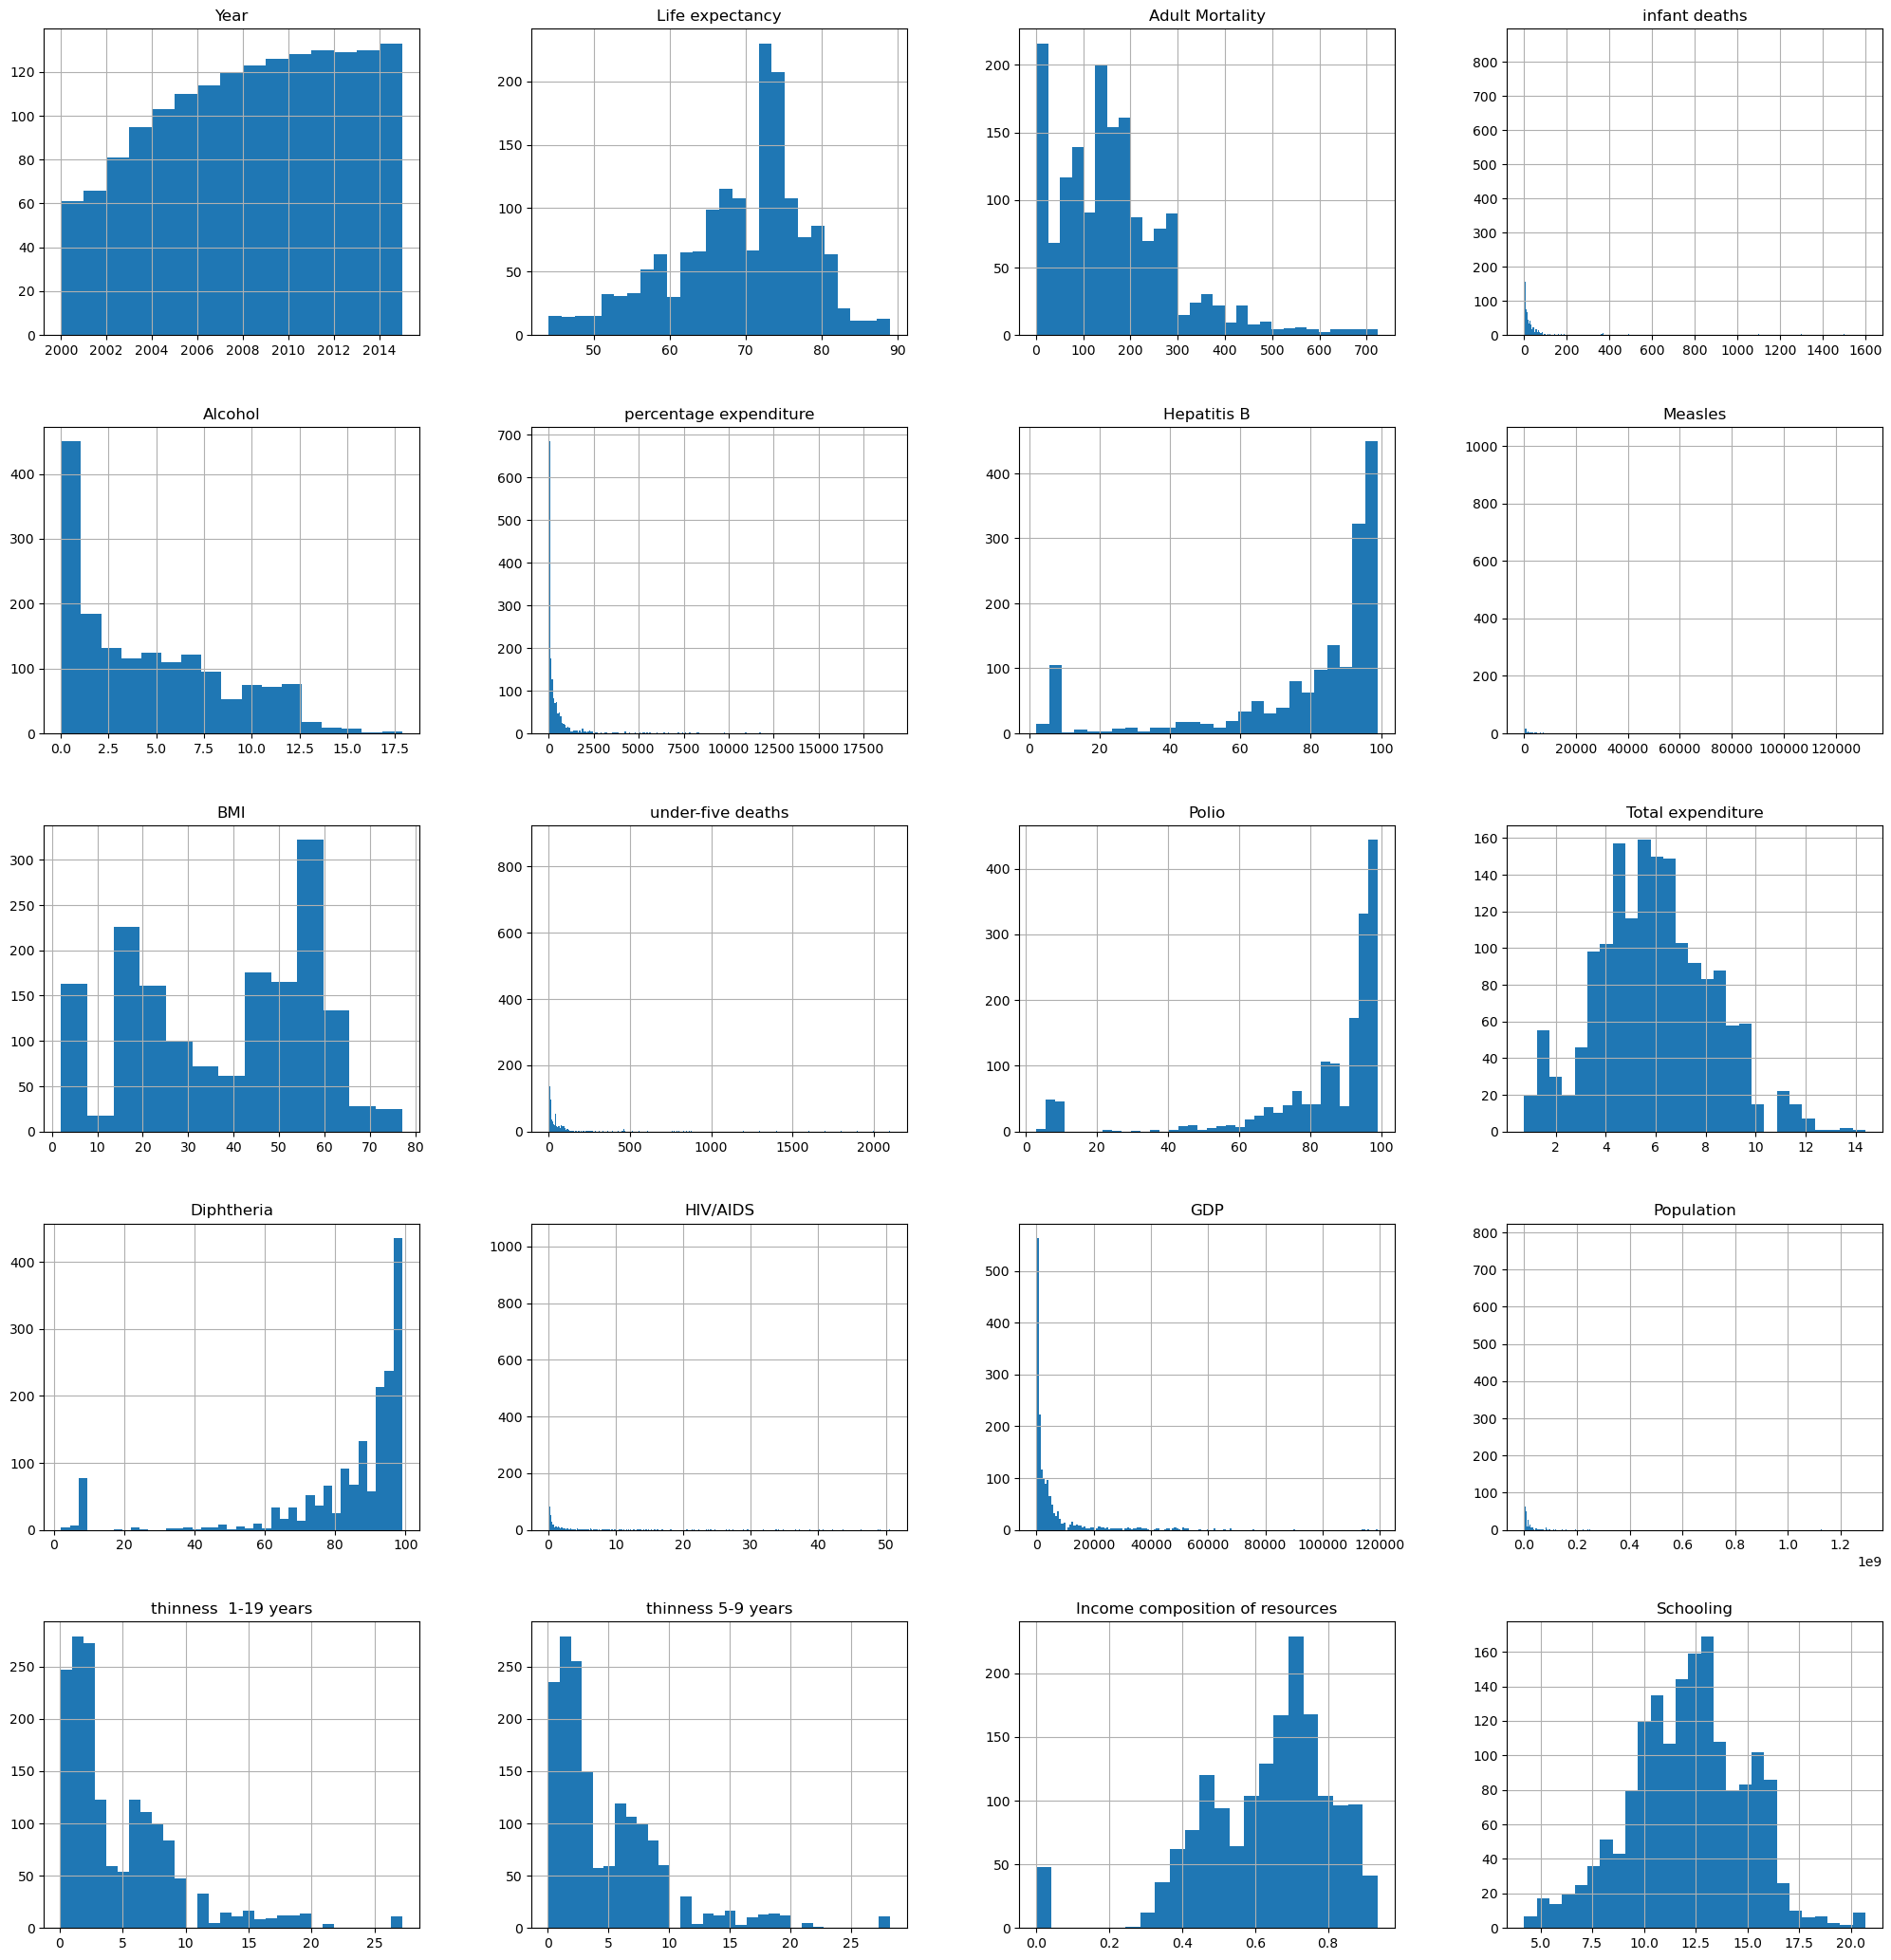

In [7]:
df.hist(bins="auto", figsize=(25, 26))
plt.show()

Year - выглядик ок
Life expectancy - странно, что значения проседают на 60 и 70 годах. Выбросов явных нет

Явные выбросы на 6 графиках, поймала визуально (из-за несоотвествуия x шкалы размеру графика), щас удалим

In [8]:
df.loc[df["HIV/AIDS"] > 2.5, "HIV/AIDS"] = np.nan
df.loc[df["infant deaths"] > 100.0, "infant deaths"] = np.nan
df.loc[df["percentage expenditure"] > 1500.0, "percentage expenditure"] = np.nan
df.loc[df["Measles"] > 300.0, "Measles"] = np.nan
df.loc[df["GDP"] > 20000.0, "GDP"] = np.nan
df.loc[df["under-five deaths"] > 100.0, "under-five deaths"] = (
    np.nan
)  # интеренет сказал, что смертность 4 ребенка/год до 5 лет в год - это нормально
df.loc[df["Population"] > 100000000.0, "Population"] = (
    np.nan
)  # наверное не стоит срезать больше. 1 млрд - это вполне реальное значение
df.loc[df["thinness  1-19 years"] > 20.0, "thinness  1-19 years"] = np.nan
df.loc[df["thinness 5-9 years"] > 20.0, "thinness 5-9 years"] = np.nan
df = (
    df.dropna()
)  # удаляем строки с пропущенными значениями, потому что модели машинного обучения не умеют с ними работать

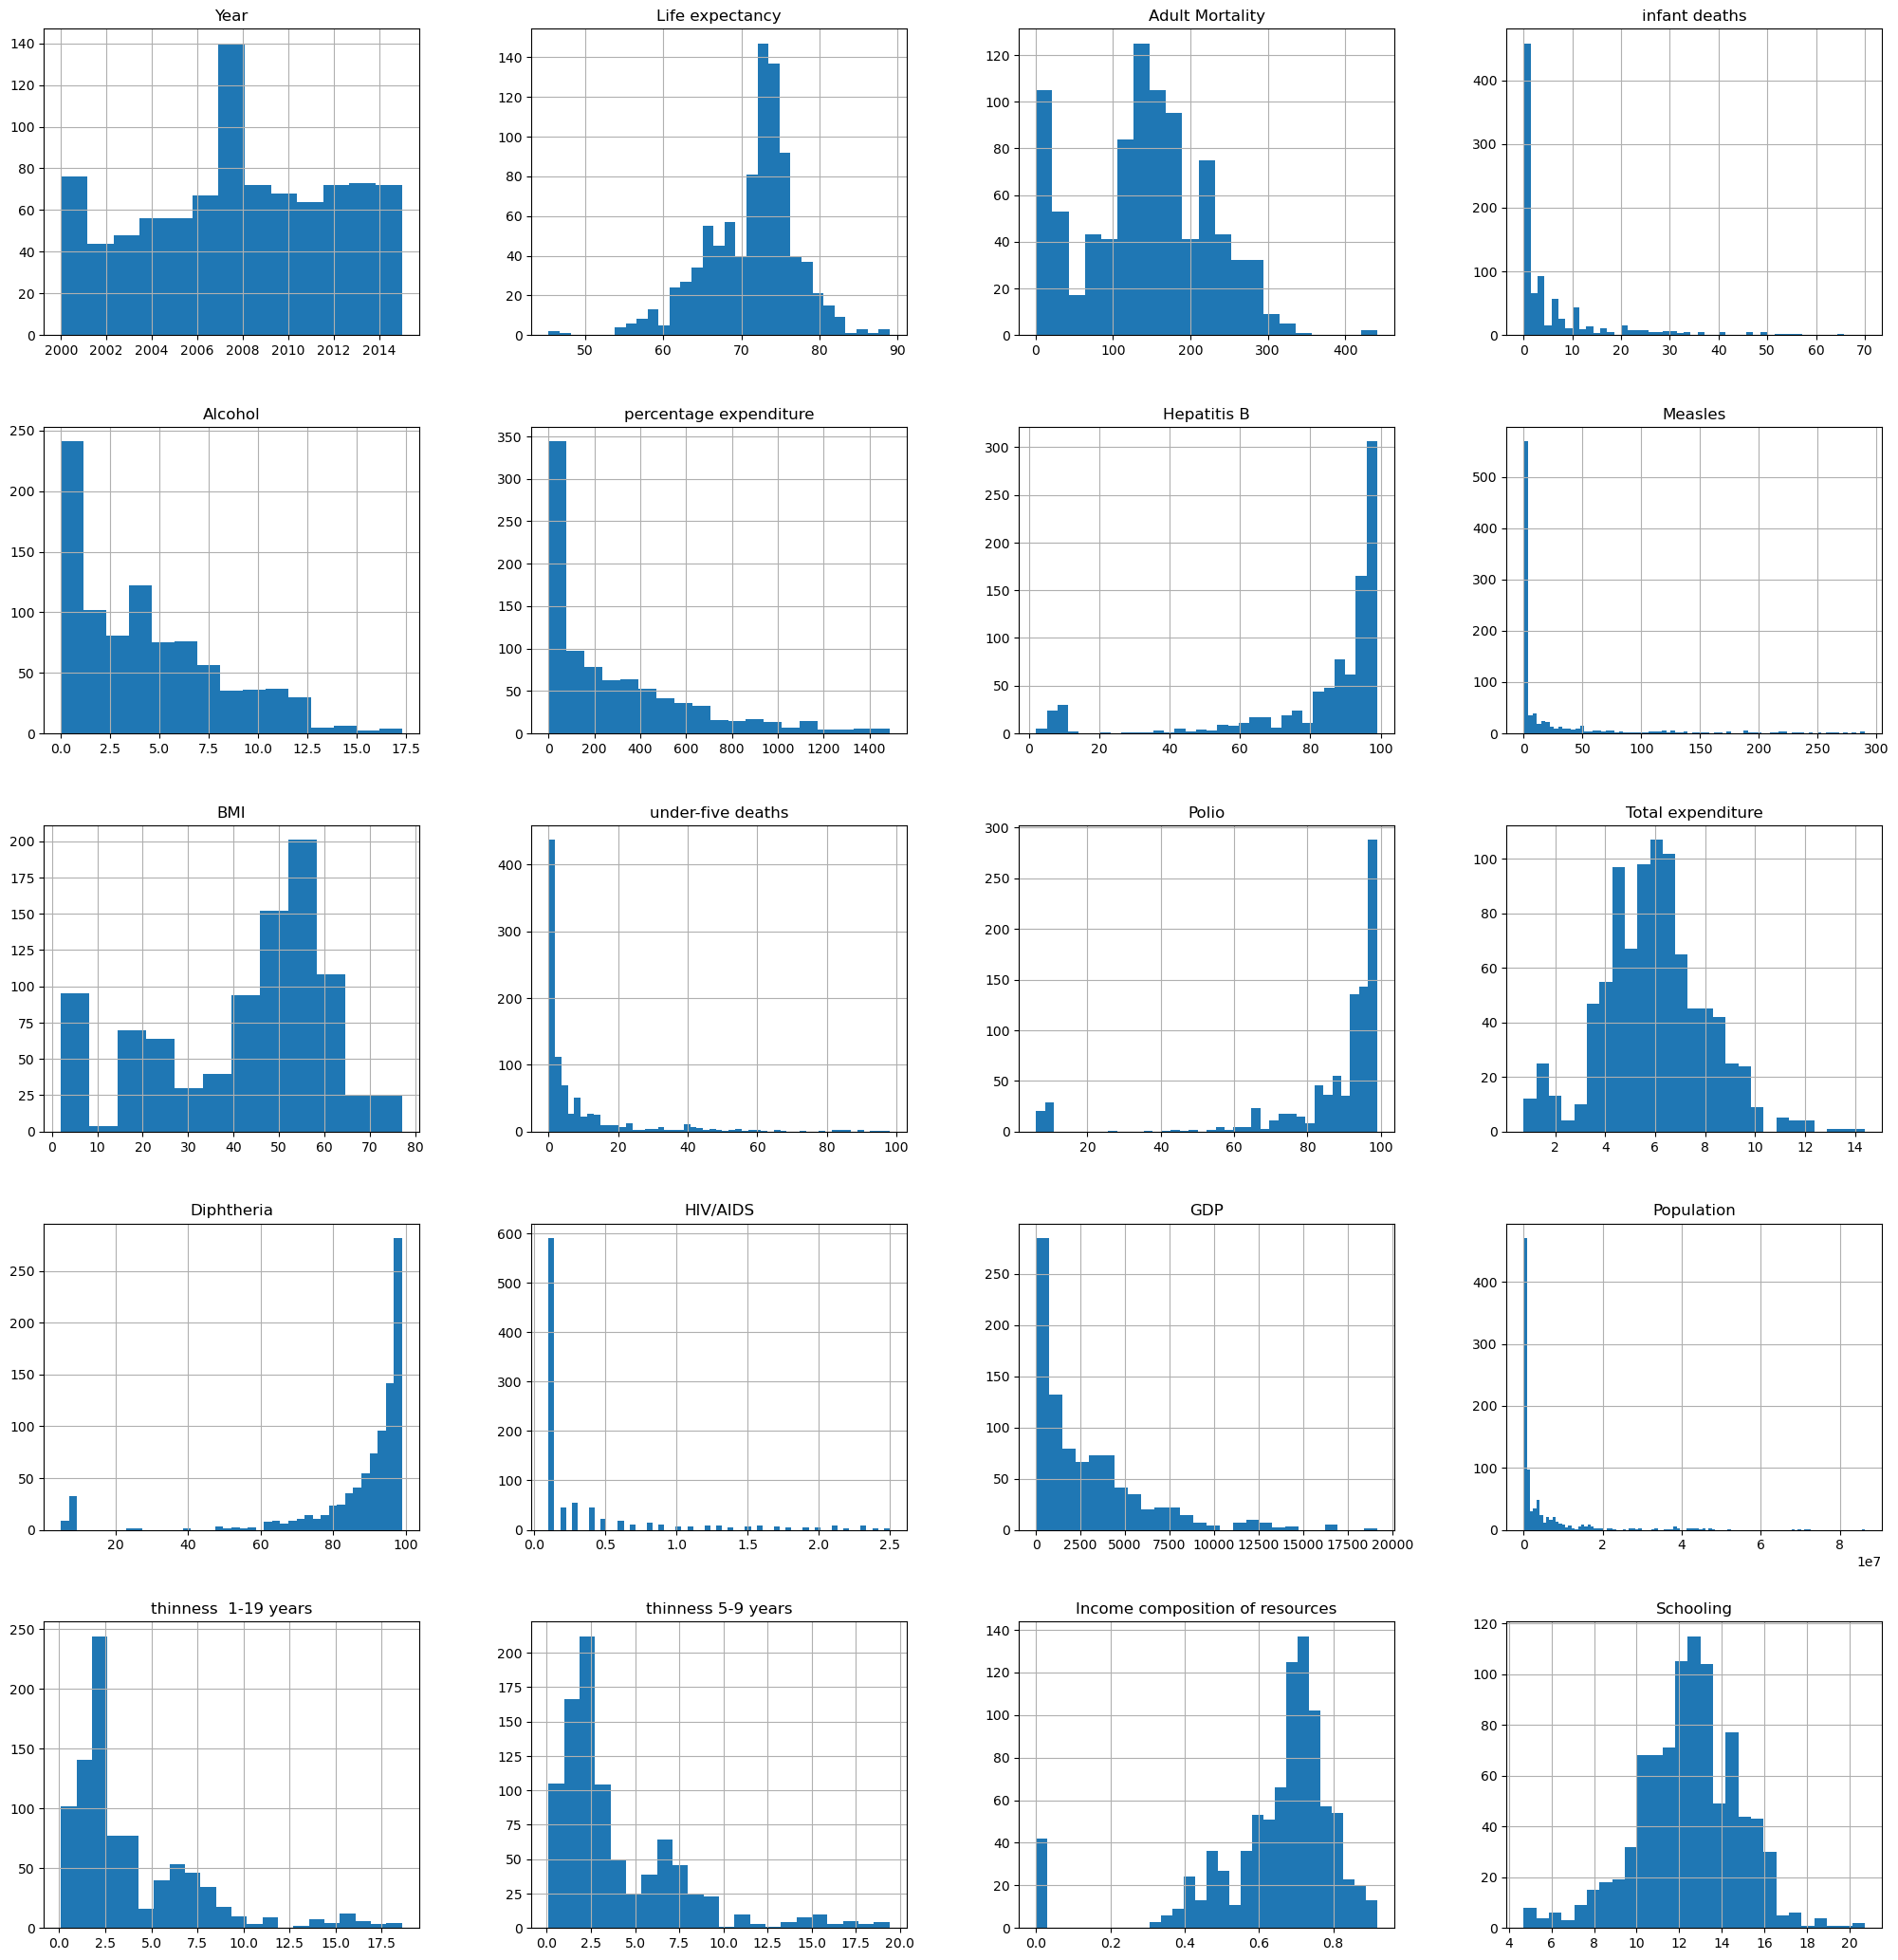

In [9]:
df.hist(bins="auto", figsize=(25, 26))
plt.show()

Найдите что из этого **фичи**, что из этого **таргет** и положите соответствующие данные в X (фичи) и y (таргетная переменная).

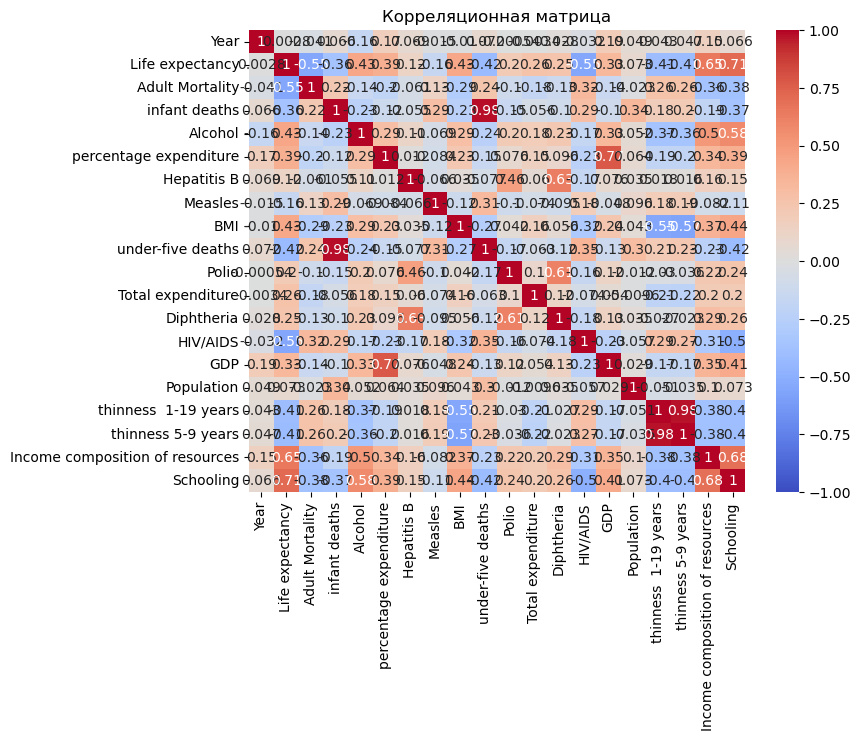

In [10]:
corr_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)

plt.title("Корреляционная матрица")
plt.show()

In [11]:
X = df.drop(
    columns=["Life expectancy", "GDP", "infant deaths"]
)  # удаляем целевую переменную и переменные, которые сильно коррелируют с другими
y = df["Life expectancy"]

Ну раз мы хотим предсказавать продолжительность жизни, то это таргет

После всего этого вам нужно будет разбить датасет на **тренировочную и тестовую выборки**. 

Тестовая выборка понадобится нам для того, чтобы оценить, насколько наша модель переобучилась. Для этого используйте функцию [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Не забудьте установить какое-то значение в `random_seed` для воспроизводимости. И определите соотношение train/test в процентах через параметр `test_size`

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

И вот только теперь **время для стандартизации** ваших данных и вот почему.

Вы уже знаете, что перед тем как положить **ваши данные** в модель их нужно привести к более менее одной и той же шкале, то есть **стандартизовать**. Для этого можно использовать уже наш любимый `StandardScaler`. У него есть `fit`, и есть `transform`. Но его **нельзя использовать на всём** нашем датасете!

Дело в том, что при работе с моделями машинного обучения мы очень **боимся раньше времени "показать" данные тренировочной выборки** моделе, aka *Data linkage* или утечка данных. Представьте, что у вас есть класс учеников, которые кое-как подглядели ответы на контрольную, а вам нужно оценить **реальные знания**. Но ведь так будет нечестно. Вы потом скажете завучу, что ребята хорошо знают материал, умеют обобщать и справляться с разными вариациями стандартных задач, но ведь это неправда. 

Когда вы фитите скейлер на **всём датасете**, вы вычисляете среднее и дисперсию по **всем-всем данным**, и по трейну и по тесту, а значит неизбежно **даёте моделе подглядеть** ваш тест, который мы так бережно хотим спрятать. Поэтому вот как вам обычно нужно действовать:
* загрузили датасет
* сделали EDA, выбрали фичи и всё такое
* разбили на трейн и тест
* зафитили скейлер **только на трейне**
* трансофрмировали данные трейна
* трансформировали данные теста

Попробуйте ниже!

In [13]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Часть 2. Создание и сравнение моделей (35 баллов)

Создайте две модели - обычную **линейную регрессию** и **ElasticNet**. 

In [14]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_predict = lr.predict(X_test_scaled)

Проанализируйте значения метрик **MSE, RMSE, MAE, R-squared, adjusted R-squared** для полученных моделей на тренировочном датасете. Сделайте вывод о лучшей модели. 

Залезьте в документацию и обратите внимание на **порядок**, в котором нужно передавать переменные в функции. Есть разница между тем, чтобы первой сообщать настоящие значения y, а потом предсказанные и наоборот.

In [15]:
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_predict)
r_squared = r2_score(y_test, y_predict)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R^2: {r_squared}")

MSE: 10.718633872814058
RMSE: 3.2739324783529145
MAE: 2.5640154870233927
R^2: 0.6538796904142863


R^2:0 - плохо, ближе к 1 - отлично, меньше 0 - треш
Я считаю, что 0.66 это не плохо, пойдет

In [16]:
en = ElasticNet(alpha=0.1, l1_ratio=0.05)
en.fit(X_train_scaled, y_train)
y_predict = en.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_predict)
r_squared = r2_score(y_test, y_predict)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R^2: {r_squared}")

MSE: 10.436563007128013
RMSE: 3.230566979204736
MAE: 2.538002383007641
R^2: 0.6629881697704089


При использовании en = ElasticNet(alpha=0.1, l1_ratio=0.1) с такими параметрами удалось добиться наилучшего результата R^2, но изменения были в тысячных долях, что мало
Упор на L2, потому что по логике параметры должны быть скореллированы

Upd когда я писала это объяснение, я решила посмотреть, что будет если удалить некоторые скореллированные переменные - показатели модели ухудшились на 1 десятую для обычной линейной, и на 1 сотую для второй модели по R^2. Остальные параметры остались +- такими же

Ну лучше когда меньше коррелированных, так что оставляем второй вариант


Для обеих моделей можно получить **вектор значений весов** при переменных. Эти веса указывают на вклад переменной в регрессию. Какие переменные наиболее важны для предсказания *life expectancy* по мнению обеих моделей?

In [17]:
coefficients = pd.DataFrame(
    {"Признак": X_train.columns, "Вес": lr.coef_}  # Имена колонок  # Веса модели
)

coefficients

,Признак,Вес
0,Year,-0.375692
1,Adult Mortality,-1.392001
2,Alcohol,0.146185
3,percentage expenditure,0.442194
4,Hepatitis B,-0.349771
5,Measles,0.029371
6,BMI,0.060518
7,under-five deaths,-0.722213
8,Polio,-0.146107
9,Total expenditure,0.457477


In [18]:
coefficients = pd.DataFrame(
    {"Признак": X_train.columns, "Вес": en.coef_}  # Имена колонок  # Веса модели
)

coefficients

,Признак,Вес
0,Year,-0.302482
1,Adult Mortality,-1.317017
2,Alcohol,0.204839
3,percentage expenditure,0.443483
4,Hepatitis B,-0.257985
5,Measles,-0.000000
6,BMI,0.131883
7,under-five deaths,-0.700643
8,Polio,-0.065891
9,Total expenditure,0.433341


Выводы: на уровень продолжительности жизни очень положительно влияет уровень образования, income composition of resources
Очень отриццательно: взрослая смертность (вдруг там война, плохая медецина), ВИЧ (тяжело и дорого лечиться, а еще распространен там где малый уровень образования и качества жизни)

Теперь нам нужно **оценить, не переобучаются ли наши модели**. Для этого вспомним о тестовой выборке и получим значения метрик для нее.

In [19]:
y_predict_test = lr.predict(X_test_scaled)

mse_test = mean_squared_error(y_test, y_predict_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_predict_test)
r_squared_test = r2_score(y_test, y_predict_test)

print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"MAE: {mae_test}")
print(f"R^2: {r_squared_test}")

MSE: 10.718633872814058
RMSE: 3.2739324783529145
MAE: 2.5640154870233927
R^2: 0.6538796904142863


In [20]:
y_predict_test = en.predict(X_test_scaled)

mse_test = mean_squared_error(y_test, y_predict_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_predict_test)
r_squared_test = r2_score(y_test, y_predict_test)

print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"MAE: {mae_test}")
print(f"R^2: {r_squared_test}")

MSE: 10.436563007128013
RMSE: 3.230566979204736
MAE: 2.538002383007641
R^2: 0.6629881697704089


Показатели не стали сильно хуже, а значит переобучения не было. Круто 🎉

**(доп задание: 15 баллов)** А теперь мы предлагаем вам немного поиграть **с соотношением тестовой и тренировочной выборки**. Как мы уже говорили на лекции обычно берётся 80% данных в тест и 20% в трейн. Попробуйте сделать **наоборот** и посмотреть что получится. Не забудьте описать ваши наблюдения.

In [21]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X, y, test_size=0.8, random_state=42
)

scaler = StandardScaler()
X_train_new_scaled = scaler.fit_transform(X_train_new)
X_test_new_scaled = scaler.transform(X_test_new)

lr_new = LinearRegression()
lr_new.fit(X_train_new_scaled, y_train_new)

en_new = ElasticNet(alpha=0.1, l1_ratio=0.1, random_state=42)
en_new.fit(X_train_new_scaled, y_train_new)


def print_metrics(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"Метрики для модели {model_name}:")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R^2: {r2}")
    print("-" * 30)


y_pred_lr_test = lr_new.predict(X_test_new_scaled)
print_metrics(y_test_new, y_pred_lr_test, "LinearRegression (тестовая выборка)")

y_pred_lr_train = lr_new.predict(X_train_new_scaled)
print_metrics(y_train_new, y_pred_lr_train, "LinearRegression (тренировочная выборка)")

y_pred_en_test = en_new.predict(X_test_new_scaled)
print_metrics(y_test_new, y_pred_en_test, "ElasticNet (тестовая выборка)")

y_pred_en_train = en_new.predict(X_train_new_scaled)
print_metrics(y_train_new, y_pred_en_train, "ElasticNet (тренировочная выборка)")

Метрики для модели LinearRegression (тестовая выборка):
MSE: 12.33409998298645
RMSE: 3.5119937333353044
MAE: 2.6101077773174906
R^2: 0.6248518554573272
------------------------------
Метрики для модели LinearRegression (тренировочная выборка):
MSE: 9.58553841976765
RMSE: 3.0960520699380445
MAE: 2.4155972198747957
R^2: 0.7077903297203489
------------------------------
Метрики для модели ElasticNet (тестовая выборка):
MSE: 10.475913986948122
RMSE: 3.236651662899195
MAE: 2.4778218659359634
R^2: 0.6813695608100099
------------------------------
Метрики для модели ElasticNet (тренировочная выборка):
MSE: 9.692088600506263
RMSE: 3.113211942754021
MAE: 2.449383080099204
R^2: 0.7045422082462687
------------------------------


Так, 

Я очень рада, что мои параметры для ElasticNet повысили R^2 для тренировчной выборки на 0.06 чем для LinearRegression. Мелочь, а приятно.

Тренировочные выборки показывают лучшие показатели, чем тестовые, но разрыв не большой. Видимо в этом случае размер выборки не имеет значения по сравнению с классическим делением (значения почти одинаковы), так как данных либо много (что вообще-то удивительная ситуация, ведь данных много не бывает), либо за счет сокращения выборки train мы уменьшили шумы, что компенсирует меньший объем данных для тренировки (несмотря на то, что выборка меньше данных все равно достаточно для обучения)

Напишите нам ваши мысли о том, как вам эта часть домашки. Расскажите, что понравилось больше всего, что меньше. Сколько времени вы на неё потратили и где делали: в пути, дома, на работе, на учёбе.

Ответ: часа 4, дома. Я под конец уже начала путаться, что у меня train, что у меня test. Но глобально строить такие модели проще, чем понимать математику в их основе. Надоело делать EDA...